(-0.5, 959.5, 1279.5, -0.5)

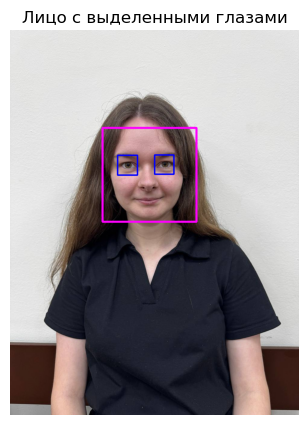

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def exctract_face_fragment(image):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    fragment = []
    for (x, y, w, h) in faces:
        fragment_size = (w * 2, h * 2)
        
        x_center = x + w / 2
        y_center = y + h / 2
        
        x_start = max(0, x_center - fragment_size[0] // 2) 
        y_start = max(0, y_center - fragment_size[1] // 2) 
        
        x_end = min(image.shape[1], x_center + fragment_size[0] // 2) 
        y_end = min(image.shape[0], y_center + fragment_size[1] // 2) 
    return fragment

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

image = cv2.imread('olesya.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 255), 5)  # Рисуем прямоугольник вокруг лица
    face_img = image[y:y + h, x:x + w]  # Извлекаем изображение лица
    eyes = eye_cascade.detectMultiScale(face_img, 1.3, 5)  # Обнаружение глаз

    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(image, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 3)  # Рисуем прямоугольник вокруг глаза

plt.figure(figsize=(5, 5))
plt.subplot(1, 1, 1)
plt.title('Лицо с выделенными глазами')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')